In [ ]:
!pip install datasets

In [ ]:
from datasets import list_datasets
all_datasets = list_datasets()
all_datasets[:10]

<ipython-input-2-8046f20b01a3>:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


['amirveyseh/acronym_identification',
 'ade-benchmark-corpus/ade_corpus_v2',
 'UCLNLP/adversarial_qa',
 'Yale-LILY/aeslc',
 'nwu-ctext/afrikaans_ner_corpus',
 'fancyzhx/ag_news',
 'allenai/ai2_arc',
 'google/air_dialogue',
 'komari6/ajgt_twitter_ar',
 'legacy-datasets/allegro_reviews']

In [ ]:
from datasets import load_dataset
emotions = load_dataset('emotion')

In [ ]:
train_ds = emotions['train']
train_ds.column_names

['text', 'label']

In [ ]:
emotions.set_format(type = 'pandas')

In [ ]:
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
emotions['train'].features['label'].int2str(0)

'sadness'

In [ ]:
df['label_name'] = df.label.apply(lambda x: emotions['train'].features['label'].int2str(x))
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
df['Words Per Tweet'] = df.text.str.split().apply(len)
df.head()

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


<Axes: xlabel='label_name', ylabel='Words Per Tweet'>

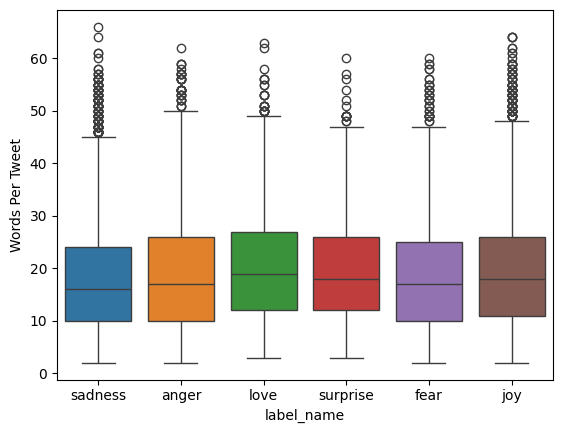

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'label_name', y = 'Words Per Tweet', hue = 'label_name')

In [ ]:
emotions.reset_format()

In [ ]:
text = 'Tokenized Text is a key element in NLP'
tokenized_text = list(text)
token_dict = {ch: idx for idx, ch in enumerate(set(sorted(tokenized_text)))}
token_dict

{'L': 0,
 'a': 1,
 's': 2,
 'P': 3,
 'l': 4,
 'x': 5,
 'd': 6,
 'T': 7,
 'i': 8,
 'e': 9,
 'k': 10,
 ' ': 11,
 'y': 12,
 't': 13,
 'z': 14,
 'N': 15,
 'm': 16,
 'n': 17,
 'o': 18}

In [ ]:
input_tokens = [token_dict[ch] for ch in tokenized_text]
input_tokens

[7,
 18,
 10,
 9,
 17,
 8,
 14,
 9,
 6,
 11,
 7,
 9,
 5,
 13,
 11,
 8,
 2,
 11,
 1,
 11,
 10,
 9,
 12,
 11,
 9,
 4,
 9,
 16,
 9,
 17,
 13,
 11,
 8,
 17,
 11,
 15,
 0,
 3]

In [ ]:
import torch
import torch.nn.functional as F
input_tokens = torch.tensor(input_tokens)
input_tokens

tensor([ 7, 18, 10,  9, 17,  8, 14,  9,  6, 11,  7,  9,  5, 13, 11,  8,  2, 11,
         1, 11, 10,  9, 12, 11,  9,  4,  9, 16,  9, 17, 13, 11,  8, 17, 11, 15,
         0,  3])

In [ ]:
one_hot_encodings = F.one_hot(input_tokens, num_classes = len(token_dict))

In [ ]:
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
from transformers import DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [ ]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 3550, 3793, 2003, 1037, 3145, 5783, 1999, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##ized',
 'text',
 'is',
 'a',
 'key',
 'element',
 'in',
 'nl',
 '##p',
 '[SEP]']

In [ ]:
def tokenize(batch):
  return tokenizer(batch['text'], padding = True, truncation = True)

In [ ]:
tokenize(emotions['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
emotions_encoded = emotions.map(tokenize, batched = True, batch_size = None)

In [ ]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors = 'pt')
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [ ]:
print(inputs['input_ids'].size())

torch.Size([1, 6])


In [ ]:
from transformers import AutoModel
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [ ]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs.last_hidden_state[:, 0].size())

torch.Size([1, 768])


In [ ]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {'hidden_state': last_hidden_state[:,0].cpu().numpy()}

In [ ]:
emotions_encoded.set_format('torch', columns = ['input_ids', 'attention_mask', 'label'])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched = True)

In [ ]:
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape

(16000, 768)

In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

X_scaled = MinMaxScaler().fit_transform(X_train)

mapper = UMAP(n_components = 2, metric = 'cosine').fit(X_scaled)

df_emb = pd.DataFrame(mapper.embedding_, columns = ['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.191056,6.711594,0
1,-3.394426,6.642763,0
2,5.070927,3.126117,3
3,-2.722971,4.543203,2
4,-3.511698,4.630748,3


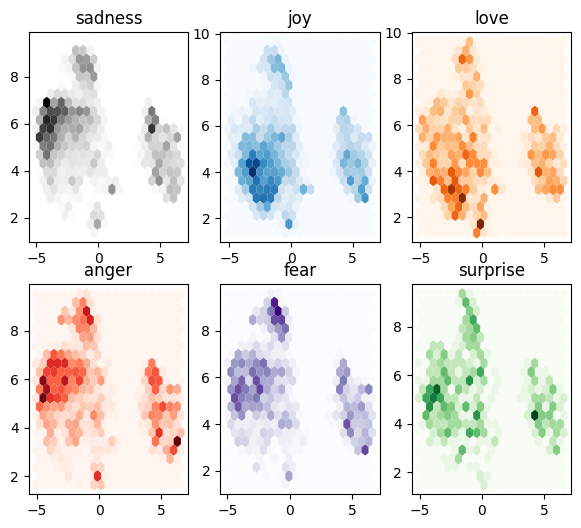

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize = (7, 6))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap = cmap, gridsize = 20, linewidths = (0,))
  axes[i].set_title(label)

In [ ]:
!pip install umap-learn